In [1]:
import camelot as cm
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [55]:
base_educacion = pd.read_csv( r'../outcomes/base_completa_panel.csv')
base_educacion

,Unnamed: 0,dni,period,FC1,FC10,FC100,FC101,FC102,FC103,FC104,...,rate_approv,w_fc,w_gc,t_cre_fc,t_cre_gc,ave_gc,ave_fc,ave_total,id,signup
0,0,940893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,940893,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,236.0,87.0,16.0,6.0,14.500000,14.750000,14.681818,1.0,1
2,1,961093,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,311.0,73.5,23.0,4.5,16.333333,13.521739,13.981818,2.0,1
3,2,961093,2.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,1.000000,260.0,64.5,18.0,4.5,14.333333,14.444444,14.422222,2.0,1
4,3,7469182,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.833333,206.0,58.5,16.0,4.5,13.000000,12.875000,12.902439,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2287,9286729,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,245.0,90.0,17.0,5.5,16.363636,14.411765,14.888889,1.0,1
3108,2288,9694083,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3109,2288,9694083,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,267.0,91.5,17.0,5.5,16.636364,15.705882,15.933333,1.0,1
3110,2289,9713377,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [56]:
# renombrando las varaibles 

base_educacion = base_educacion.rename({'period':'Periodo', 'section':'Nivel', 'carrera':'Carrera','shift':'Turno'
                                       , 'ave_total':'Nota promedio general', 'ave_gc':'Nota promedio de cursos generales',
                                        'ave_fc':'Nota promedio de cursos de carrera','rate_approv':'ratio de aprobación por alumno'}
                                      , axis=1)

In [57]:
# Base de datos está restringida para alumnos los niveles II, IV en el semestre 2019 -2, y III,V en 2020-1

base_educacion = base_educacion[(base_educacion.Nivel > 1) & (base_educacion.Nivel < 6)]
base_educacion = base_educacion.drop(base_educacion[(base_educacion.Periodo == 1) & (base_educacion.Nivel == 5)].index)

### Tabla 1 - total de alumnos matriculados por periodo y nivel

In [303]:
# Número de alumnos por nivel y semestre

base = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Nivel'] ).size().reset_index(name='Alumnos matriculados')
base

,Periodo,Nivel,Alumnos matriculados
0,1.0,2.0,380
1,1.0,4.0,392
2,2.0,3.0,366
3,2.0,5.0,385


### Alrededor de 400 alumnos por cada nivel tanto en el periodo 2019 - 2 y 2020-1

### Figura 1 - total de alumnos matriculados por periodo y nivel

[Text(0, 0, 'Nivel II (2019-2)'),
 Text(1, 0, 'Nivel IV (2019-2)'),
 Text(2, 0, 'Nivel III (2020-1)'),
 Text(3, 0, 'Nivel V (2020-1)')]

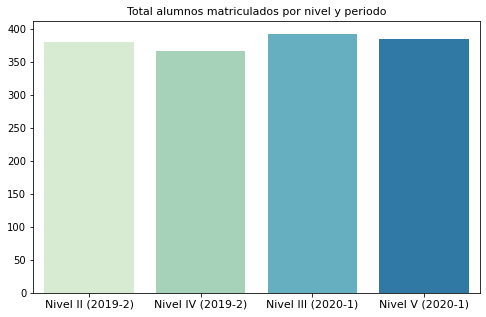

In [88]:
fig, ax = plt.subplots(figsize=(8,5))


base = base_educacion[base_educacion.signup == 1]

ax = sns.countplot(x="Nivel", data=base, palette='GnBu')

#plt.legend(labels=['2019-2','2020-1','r','r'],  title = "Semester", frameon=True, bbox_to_anchor=(1.2, 0.7), ncol=1)
plt.title('Total alumnos matriculados por nivel y periodo', size=11)
plt.ylabel('')
plt.xlabel('')
(ax.set_xticklabels(["Nivel II (2019-2)", "Nivel IV (2019-2)","Nivel III (2020-1)", "Nivel V (2020-1)"], size=11))

### No se observa una abrupta caída en la matricula para el periodo 2020-1

### Tabla 2 - matriculados por carrera

In [95]:
# Número de alumnos amtriculados por carrera y semestre

base = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Carrera'] ).size().reset_index(name='Alumnos matriculados')
base.sort_values('Carrera')

,Periodo,Carrera,Alumnos matriculados
0,1.0,Administracion de empresas,144
7,2.0,Administracion de empresas,139
1,1.0,Computacion e informatica,131
8,2.0,Computacion e informatica,127
2,1.0,Contabilidad,162
9,2.0,Contabilidad,166
3,1.0,Electrotecnia industrial,110
10,2.0,Electrotecnia industrial,102
4,1.0,Mecanica automotriz,103
11,2.0,Mecanica automotriz,101


### Figura 2

Text(0.5, 0, '')

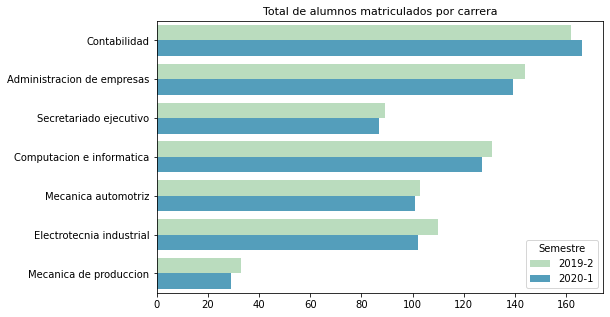

In [91]:
fig, ax = plt.subplots(figsize=(8,5))

base = base_educacion[base_educacion.signup == 1]

ax = sns.countplot(y="Carrera", hue="Periodo", data=base, palette='GnBu')

plt.legend(labels=['2019-2','2020-1'],  title = "Semestre", frameon=True)
plt.title('Total de alumnos matriculados por carrera', size=11)
plt.ylabel('')
plt.xlabel('')

### A excepción de la carrera de contabilidad, se observa una menor matrícula por carrera para el 2020-1

### Figura 3 - nota promedio general e histograma de frecuencias-

Text(0.5, 0, '')

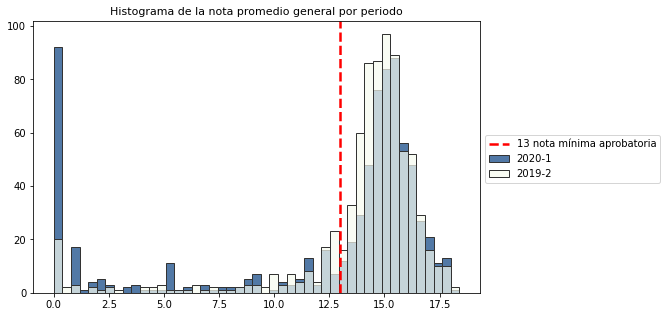

In [105]:
fig, ax = plt.subplots(figsize=(8,5))

fig = sns.histplot(data =base_educacion,
            x = 'Nota promedio general',
            alpha = 0.7,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1
            )
plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['13 nota mínima aprobatoria','2020-1','2019-2'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.6))
plt.title('Histograma de la nota promedio general por periodo', size=11)
plt.ylabel('')
plt.xlabel('')


## La deserción de estudiantes se multiplicó en casi 5 veces. Adicionalmente, se evidencia una mayor desaprobación.

### Tabla 3 - Estadísticos desciptivos básicos

In [109]:
# Periodo 2019-2

pd.set_option('precision', 1) ## un decimal
 
base_educacion[['Nota promedio de cursos generales', 'Nota promedio de cursos de carrera', 
                'Nota promedio general','ratio de aprobación por alumno']][base_educacion.Periodo == 1].describe()



,Nota promedio de cursos generales,Nota promedio de cursos de carrera,Nota promedio general,ratio de aprobación por alumno
count,764.0,769.0,772.0,772.0
mean,14.3,13.8,13.9,0.9
std,3.5,3.6,3.4,0.2
min,0.0,0.0,0.0,0.0
25%,14.0,13.7,13.8,1.0
50%,15.0,14.7,14.7,1.0
75%,16.0,15.6,15.6,1.0
max,18.4,18.7,18.4,1.0


In [110]:
# Periodo 2020-1
base_educacion[['Nota promedio de cursos generales', 'Nota promedio de cursos de carrera', 
                'Nota promedio general','ratio de aprobación por alumno']][base_educacion.Periodo == 2].describe()

,Nota promedio de cursos generales,Nota promedio de cursos de carrera,Nota promedio general,ratio de aprobación por alumno
count,743.0,747.0,751.0,751.0
mean,12.2,12.1,12.1,0.8
std,5.9,5.8,5.7,0.4
min,0.0,0.0,0.0,0.0
25%,10.0,11.7,11.5,0.8
50%,15.0,14.6,14.7,1.0
75%,16.0,15.6,15.6,1.0
max,18.0,19.0,18.1,1.0


### Se observa un menor promedio en general y mayor dispersión de las notas. La nota promedio general de todos los alumnos del periodo 2020-1 es menor a la nota mínima aprobatoria. 

### Figura 4 - Diagrama de caja de las nota promedio general 

Text(0.5, 0, 'Periodo')

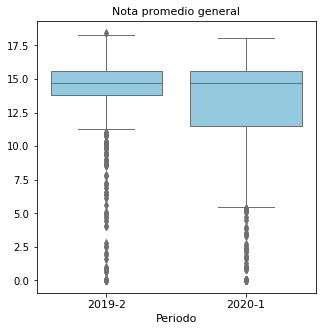

In [129]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.boxplot(x="Periodo", y="Nota promedio general",
                 data=base_educacion,
                 linewidth= 1, color="skyblue")

(ax.set_xticklabels(["2019-2", "2020-1"], size=11))
plt.title('Nota promedio general', size=11)
plt.ylabel('')
plt.xlabel('Periodo', size=11)

### Se corrobora la mayor dispersión de la nota promedio general debido a una mayor frecuencia de notas desaprobatorias. Por ello, una parte de las notas desaprobatorias dejan de ser atipicos en comparación el periodo 2019-2.

### Figura 5 - Histograma de frecuencias de la nota promedio general por carrera

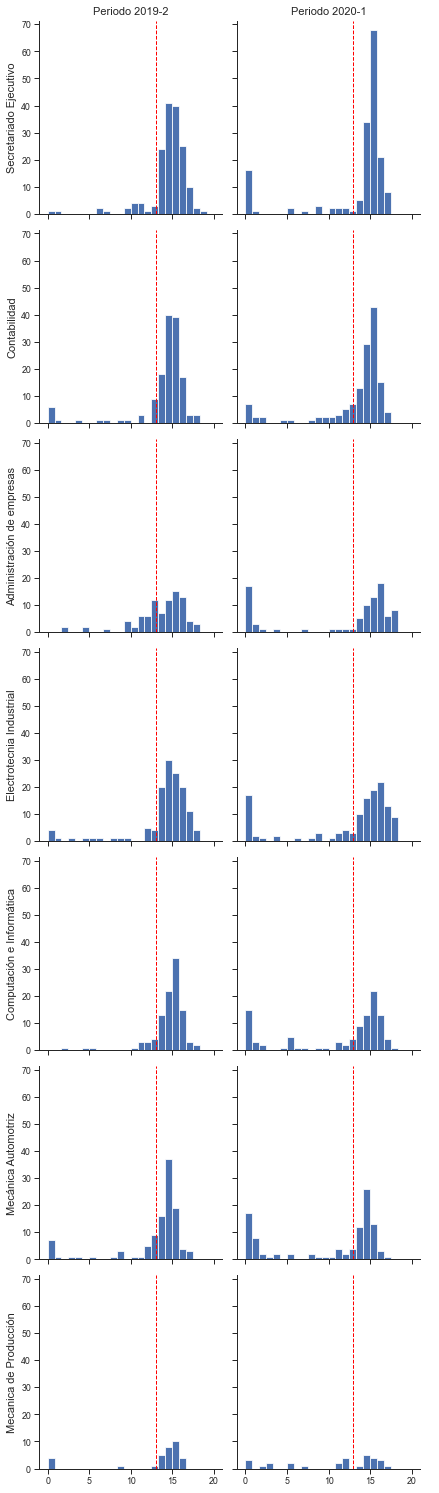

In [130]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="Carrera", col="Periodo", margin_titles=True)
grid.map(plt.hist, "Nota promedio general", bins=np.linspace(0, 20, 25), color = 'b')

for ax in grid.axes.flat:
    ax.axvline(x=13,color='red', lw=1, ls='--')

grid.set_titles(row_template = ' ')
axes = grid.axes.flatten()
axes[0].set_title("Periodo 2019-2", size=11)
axes[1].set_title("Periodo 2020-1", size=11)

careers = ['Secretariado Ejecutivo','Contabilidad','Administración de empresas', 'Electrotecnia Industrial', 
           'Computación e Informática', 'Mecánica Automotriz', 'Mecanica de Producción']
 
i = 0
j = 0

for i in range(0,14,2):
    axes[i].set_ylabel(careers[j], size=11)
    i = i+2
    j = j+1
    
for ax in axes:
    ax.set_xlabel("")

### A excepción de Mecánica de producción, se observa que todas las carreras presentan una mayor frecuencia de deserción estudiantil. 

### Tabla 4 - alumnos matriculados por carrera, periodo y turno

In [134]:
base = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Carrera','Turno'] ).size().reset_index(name='Alumnos matriculados')
base.sort_values(['Carrera','Turno'])

,Periodo,Carrera,Turno,Alumnos matriculados
0,1.0,Administracion de empresas,diurno,71
13,2.0,Administracion de empresas,diurno,64
1,1.0,Administracion de empresas,nocturno,73
14,2.0,Administracion de empresas,nocturno,75
2,1.0,Computacion e informatica,diurno,72
15,2.0,Computacion e informatica,diurno,71
3,1.0,Computacion e informatica,nocturno,59
16,2.0,Computacion e informatica,nocturno,56
4,1.0,Contabilidad,diurno,99
17,2.0,Contabilidad,diurno,96


### Figure 6 - Histograma de frecuencias y alumnos matricualdos por carrera, periodo y turno

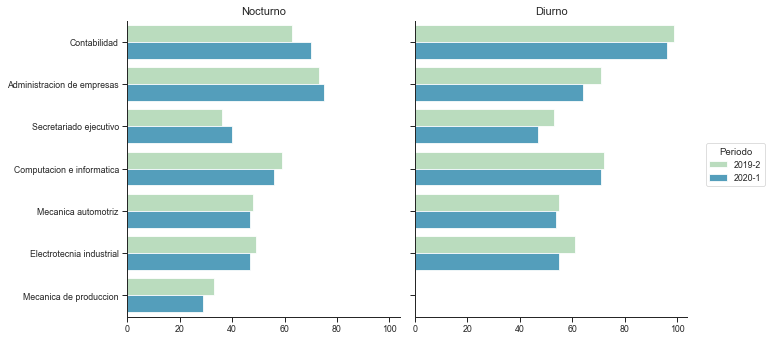

In [181]:

base = base_educacion[base_educacion.signup == 1]

ax = sns.catplot(y="Carrera", hue="Periodo", col='Turno', data=base, palette='GnBu', kind="count")

#plt.legend(labels=['2019-2','2020-1'],  title = "Periodo", frameon=True, bbox_to_anchor=(1.3, 0.6))

ax.set_titles(row_template = ' ')
axes = ax.axes.flatten()
axes[0].set_title("Nocturno", size=11)
axes[1].set_title("Diurno", size=11)

axes[0].set_ylabel('', size=11)
axes[0].set_xlabel("")
axes[1].set_xlabel("")
ax._legend.remove()
plt.legend(labels=['2019-2','2020-1'],  title = "Periodo", frameon=True, bbox_to_anchor=(1.3, 0.6))

### En general se observa una menor cantidad de alumnos matriculados en el turno diurno para el semstre 2020-1 en comparación al 2019-2. Por otro lado, en el 2020-1, se observa más alumnos matriculados en el turno noche para carreras no intensivas en equipamiento y tecnología: secretariado ejecutivo, contabilidad y administración de empresas. 

### Figura 7 y 8 - Histograma de la nota promedio general según turno

Text(0.5, 0, '')

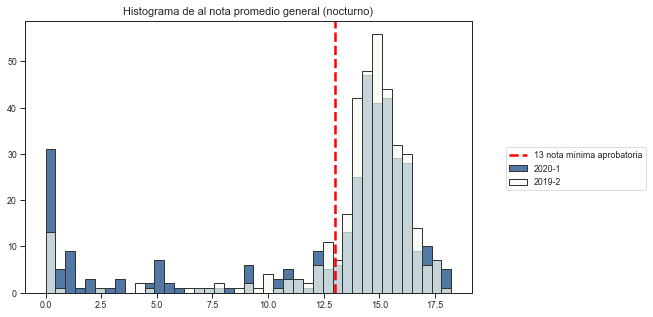

In [189]:
base1 = base_educacion[base_educacion['Turno'] == "nocturno"]

fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data = base1,
            x = 'Nota promedio general',
            alpha = 0.7,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor = "0.2",
            linewidth = 1
            )

plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['13 nota mínima aprobatoria','2020-1','2019-2'], frameon=True, bbox_to_anchor=(1.4, 0.55))
plt.title('Histograma de al nota promedio general (nocturno)', size=11)
plt.ylabel('')
plt.xlabel('')


Text(0.5, 0, '')

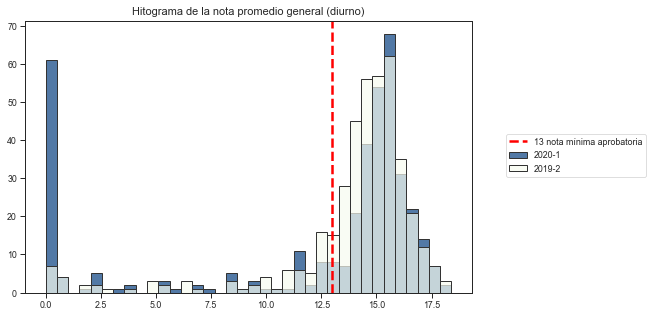

In [194]:
base1 = base_educacion[base_educacion['Turno'] == "diurno"]

fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data = base1,
            x = 'Nota promedio general',
            alpha = 0.7,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor = "0.2",
            linewidth = 1
            )

plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['13 nota mínima aprobatoria','2020-1','2019-2'], frameon=True, bbox_to_anchor=(1.4, 0.6))
plt.title('Hitograma de la nota promedio general (diurno)', size=11)
plt.ylabel('')
plt.xlabel('')

### Se evidencia una mayor desersión de estudiantes en el turno diurno o de día, pero más alumnos desaprobados en el turno noche. 

### Tabla 5 - deserción de estudiantes por periodo

In [198]:
base2 = base_educacion[(base_educacion["Nota promedio general"] == 0)].groupby( [ 'Periodo'] ).size().reset_index(name='Total de alumnos retirados')
base2 

,Periodo,Total de alumnos retirados
0,1.0,20
1,2.0,92


### Tabla 6 - deserción de estudiantes por carrera

In [210]:
# enrolled student by carrer
base2 = base_educacion[(base_educacion["Nota promedio general"] == 0)].groupby( [ 'Carrera', 'Periodo'] ).size().reset_index(name='Total de alumnos retirados')
#dict = {'Carrera': 'Mecanica automotriz', 'Periodo': 1.0, 'Total de alumnos retirados': 0}
#base2 = base2.append(dict, ignore_index = True)
df2 = pd.DataFrame({'Carrera': ['Mecanica automotriz','Secretariado ejecutivo'],
                    'Periodo' : [1.0,1.0],
                    'Total de alumnos retirados' : [0,0]})

base2  = pd.concat([base2 , df2], ignore_index = True, axis = 0).sort_values(['Carrera','Periodo'])

base2 

,Carrera,Periodo,Total de alumnos retirados
0,Administracion de empresas,1.0,6
1,Administracion de empresas,2.0,7
2,Computacion e informatica,1.0,4
3,Computacion e informatica,2.0,17
4,Contabilidad,1.0,1
5,Contabilidad,2.0,16
6,Electrotecnia industrial,1.0,5
7,Electrotecnia industrial,2.0,17
12,Mecanica automotriz,1.0,0
8,Mecanica automotriz,2.0,15


### Tabla 7 - Tasa de deserción por carrera y periodo

In [222]:

base2 = base_educacion[(base_educacion['Nota promedio general'] == 0) & (base_educacion.Periodo == 1)].groupby( [ 'Carrera'] ).size().reset_index(name='Total de alumnos retirados')
base3 =  base_educacion[(base_educacion.Periodo == 1)].groupby( [ 'Carrera', 'Periodo'] ).size().reset_index(name='Alumnos matriculados')
base41 = pd.merge(base2,base3, on = 'Carrera')
base41['Tasa de deserción(%)'] = ((base41['Total de alumnos retirados']/base41['Alumnos matriculados'])*100).astype(float)


In [225]:

base2 = base_educacion[(base_educacion["Nota promedio general"] == 0) & (base_educacion.Periodo == 2)].groupby( [ 'Carrera'] ).size().reset_index(name='Total de alumnos retirados')
base3 =  base_educacion[(base_educacion.Periodo == 2)].groupby( [ 'Carrera', 'Periodo'] ).size().reset_index(name='Alumnos matriculados')
base42 = pd.merge(base2,base3, on = 'Carrera')
base42['Tasa de deserción(%)'] = ((base42['Total de alumnos retirados']/base42['Alumnos matriculados'])*100).astype(float)

base_desercion  = pd.concat([base41 , base42], ignore_index = True, axis = 0).sort_values(['Carrera','Periodo'])

df2 = pd.DataFrame({'Carrera': ['Mecanica automotriz','Secretariado ejecutivo'],
                    'Periodo' : [1.0,1.0],
                    'Total de alumnos retirados' : [0,0],
                    'Tasa de deserción(%)' : [0,0],
                   'Alumnos matriculados' : [0,0]})

base_desercion = pd.concat([base_desercion , df2], ignore_index = True, axis = 0).sort_values(['Carrera','Periodo'])

base_desercion

,Carrera,Total de alumnos retirados,Periodo,Alumnos matriculados,Tasa de deserción(%)
0,Administracion de empresas,6,1.0,144,4.2
1,Administracion de empresas,7,2.0,139,5.0
2,Computacion e informatica,4,1.0,131,3.1
3,Computacion e informatica,17,2.0,127,13.4
4,Contabilidad,1,1.0,162,0.6
5,Contabilidad,16,2.0,166,9.6
6,Electrotecnia industrial,5,1.0,110,4.5
7,Electrotecnia industrial,17,2.0,102,16.7
12,Mecanica automotriz,0,1.0,0,0.0
8,Mecanica automotriz,15,2.0,101,14.9


In [226]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

### Figura 9 - Tasa de deserción por carrera y periodo

Text(6.5, 5, '     * Tasa de deserción del 2019-2 en rojo')

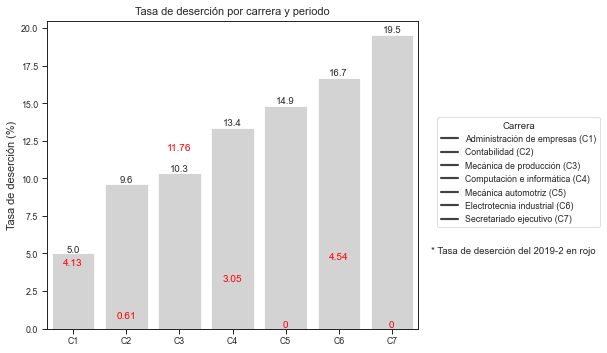

In [302]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x="Carrera", y="Tasa de deserción(%)", data=base42, color = 'lightgray',
                order=base42.sort_values('Tasa de deserción(%)').Carrera)

careers1 = ['C1','C2','C3', 'C4','C5', 'C6', 'C7']
careers2 = ['Administración de empresas (C1)','Contabilidad (C2)','Mecánica de producción (C3)', 'Computación e informática (C4)', 
           'Mecánica automotriz (C5)', 'Electrotecnia industrial (C6)', 'Secretariado ejecutivo (C7)']

(ax.set_xticklabels(careers1))
plt.xlabel('')
plt.ylabel('Tasa de deserción (%)', size=11)
plt.title('Tasa de deserción por carrera y periodo', size=11)
plt.tight_layout()
plt.legend(title='Carrera', loc='upper right', labels=careers2, bbox_to_anchor=(1.5, 0.7), ncol=1)
#plt.legend(title='2019-2', loc='upper right', labels=careers2, bbox_to_anchor=(1, 0.7), ncol=1)
show_values(ax)

des_rate19 = [4.13,0.61, 11.76, 3.05, 0, 4.54,0]

j = 0
for i in des_rate19:
    ax.text(j,i+0.1,i, color = 'red', size = 10, ha='center')
    j = j +1

#"ch:.25"

# add note

ax.annotate('     * Tasa de deserción del 2019-2 en rojo', xy = (6.5, 5))

###  Se observa una mayor tasa de deserción de estudiantes en los cursos intensicos en equipamiento y tecnología. Sin embargo, la carrera de secretariado ejecutivo muestra la mayor deserción de estudiantes: aproximadamente una quinta parte.

### Tabla 8 - deserción de estudaintes por carrera y turno en el semestre 2020 -2 

In [250]:
base2 = base_educacion[(base_educacion["Nota promedio general"] == 0) & (base_educacion.Periodo == 2)].groupby( [ 'Carrera','Turno'] ).size().reset_index(name='Alumnos retirados')
base3 =  base_educacion[(base_educacion.Periodo == 2)].groupby( [ 'Carrera','Turno']  ).size().reset_index(name='Total de alumnos matriculados')
base4 = pd.merge(base2,base3, on = ['Carrera','Turno'])
base4['Tasa de deserción (%)'] = ((base4['Alumnos retirados']/base4['Total de alumnos matriculados'])*100).astype(float)


df2 = pd.DataFrame({'Carrera': ['Mecanica de produccion'],
                    'Turno' : ['diurno'],
                    'Alumnos retirados' : [0],
                    'Total de alumnos matriculados' : [0],
                   'Tasa de deserción (%)' : [0]})

base4 = pd.concat([base4 , df2], ignore_index = True, axis = 0).sort_values(['Carrera','Turno'])

base4

,Carrera,Turno,Alumnos retirados,Total de alumnos matriculados,Tasa de deserción (%)
0,Administracion de empresas,diurno,4,64,6.2
1,Administracion de empresas,nocturno,3,75,4.0
2,Computacion e informatica,diurno,10,71,14.1
3,Computacion e informatica,nocturno,7,56,12.5
4,Contabilidad,diurno,11,96,11.5
5,Contabilidad,nocturno,5,70,7.1
6,Electrotecnia industrial,diurno,11,55,20.0
7,Electrotecnia industrial,nocturno,6,47,12.8
8,Mecanica automotriz,diurno,11,54,20.4
9,Mecanica automotriz,nocturno,4,47,8.5


### Figura 10 - Tasa de deserción por carrera y turno en el periodo 2020-1

Text(0.5, 1.0, 'Tasa de desersiónde estudiantes (%) por turno (2020-1)')

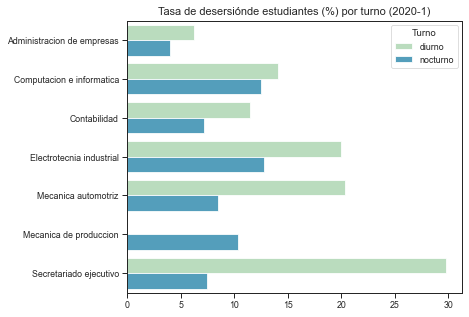

In [252]:
plt.figure(figsize=(6,5))
ax= sns.barplot( x = 'Tasa de deserción (%)', y = 'Carrera', hue= 'Turno', data = base4, palette='GnBu')
plt.xlabel('')
plt.ylabel('')
plt.title('Tasa de desersiónde estudiantes (%) por turno (2020-1)', size=11)


### El turno diurno muestra una mayor tasa de deserción

### Tabla 9 - alumnos desaprobados por periodo

In [304]:
base_educacion = base_educacion[base_educacion["Nota promedio general"]>0]

base2 = base_educacion[(base_educacion["Nota promedio general"] < 13)].groupby( [ 'Periodo'] ).size().reset_index(name='Alumnos Desaprobados')
base2
#base3 =  base_educacion[(base_educacion.Periodo == 2)].groupby( [ 'Carrera','Turno']  ).size().reset_index(name='Total de alumnos matriculados')

,Periodo,Alumnos Desaprobados
0,1.0,112
1,2.0,126


### Tabla 10 - alumnos desaprobados por periodo y carrera

In [306]:
base2 = base_educacion[(base_educacion["Nota promedio general"] < 13)].groupby( [ 'Carrera','Periodo'] ).size().reset_index(name='Alumnos Desaprobados')
base2

,Carrera,Periodo,Alumnos Desaprobados
0,Administracion de empresas,1.0,12
1,Administracion de empresas,2.0,23
2,Computacion e informatica,1.0,14
3,Computacion e informatica,2.0,18
4,Contabilidad,1.0,17
5,Contabilidad,2.0,13
6,Electrotecnia industrial,1.0,25
7,Electrotecnia industrial,2.0,27
8,Mecanica automotriz,1.0,11
9,Mecanica automotriz,2.0,23


### Se duplicó la cantidad de alumnos desaprobados en la carreras de Mecánica automotriz y administración de empresas. Secretariado ejecutivo muestra una caída importante de alumnos desaprobados a pesar de la alta cantidad de alumnos retirados. 

### Tabla 11 - varaición porcentual de alumnos desaprobados por carrere entre los periodos

In [326]:
pd.set_option('precision', 1) ## un decimal

base = base2.pivot_table(index = 'Carrera', columns = 'Periodo', values = 'Alumnos Desaprobados')
base['variación porcentual'] = (base[2.0] /base[1.0]-1)*100
base = base[['variación porcentual']]
base

Periodo,variación porcentual
Carrera,
Administracion de empresas,91.7
Computacion e informatica,28.6
Contabilidad,-23.5
Electrotecnia industrial,8.0
Mecanica automotriz,109.1
Mecanica de produccion,500.0
Secretariado ejecutivo,-67.7
